### Ispirato dal video https://www.youtube.com/watch?v=p7ZYrxZo_38 (anche se non ho capito perfettamente il tutto)

In [325]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from datetime import datetime
import plotly.graph_objects as go
from sklearn.model_selection import ParameterGrid

In [326]:
# Calcola le candele Heiken Ashi
def heiken_ashi(df):
    df['HA_Close']=(df['Open']+ df['High']+ df['Low']+df['Close'])/4
    idx = df.index.name
    df.reset_index(inplace=True)
    for i in range(0, len(df)):
        if i == 0:
            df.at[i, 'HA_Open'] = (df.at[i, 'Open'] + df.at[i, 'Close']) / 2
        else:
            df.at[i, 'HA_Open'] = (df.at[i - 1, 'HA_Open'] + df.at[i - 1, 'HA_Close']) / 2
    if idx:
        df.set_index(idx, inplace=True)
    df['HA_High']=df[['HA_Open','HA_Close','High']].max(axis=1)
    df['HA_Low']=df[['HA_Open','HA_Close','Low']].min(axis=1)
    return df

# Calcola la media mobile esponenziale
def EMA(df, period, column='Close'):
    return df[column].ewm(span=period, adjust=False).mean()

#### Dati giornalieri

In [327]:
# Scelgo quale periodo dei dati tenere

# Leggo i dati
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 26-03-2024.csv')

data_inizio = '2020-03-01'
data_fine = '2021-03-01'
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
lunghezza_periodo = (data2-data1).days
indice_inizio = dati[dati['Date'] == data_inizio].index[0]
indice_fine = dati[dati['Date'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1]

dati['Date'] = pd.to_datetime(dati['Date'])
dati.set_index('Date', inplace=True)

dati

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-01,7798.252441,7913.450684,7681.687012,7748.164551,7748.164551,31987458775
2020-03-02,7748.897949,8011.308105,7721.177734,7959.358398,7959.358398,38459105569
2020-03-03,7955.515625,8006.142578,7782.374512,7862.485352,7862.485352,37923648965
2020-03-04,7863.161621,7926.583008,7824.539062,7861.055176,7861.055176,31197955753
2020-03-05,7865.579590,8161.130371,7862.858398,8089.786133,8089.786133,35373626416
...,...,...,...,...,...,...
2021-02-25,40847.492188,42492.488281,38735.164062,38735.164062,38735.164062,44832195559
2021-02-26,38806.402344,40021.406250,36636.480469,38385.910156,38385.910156,290727102068
2021-02-27,38390.062500,39970.886719,37498.867188,38260.480469,38260.480469,38030607901


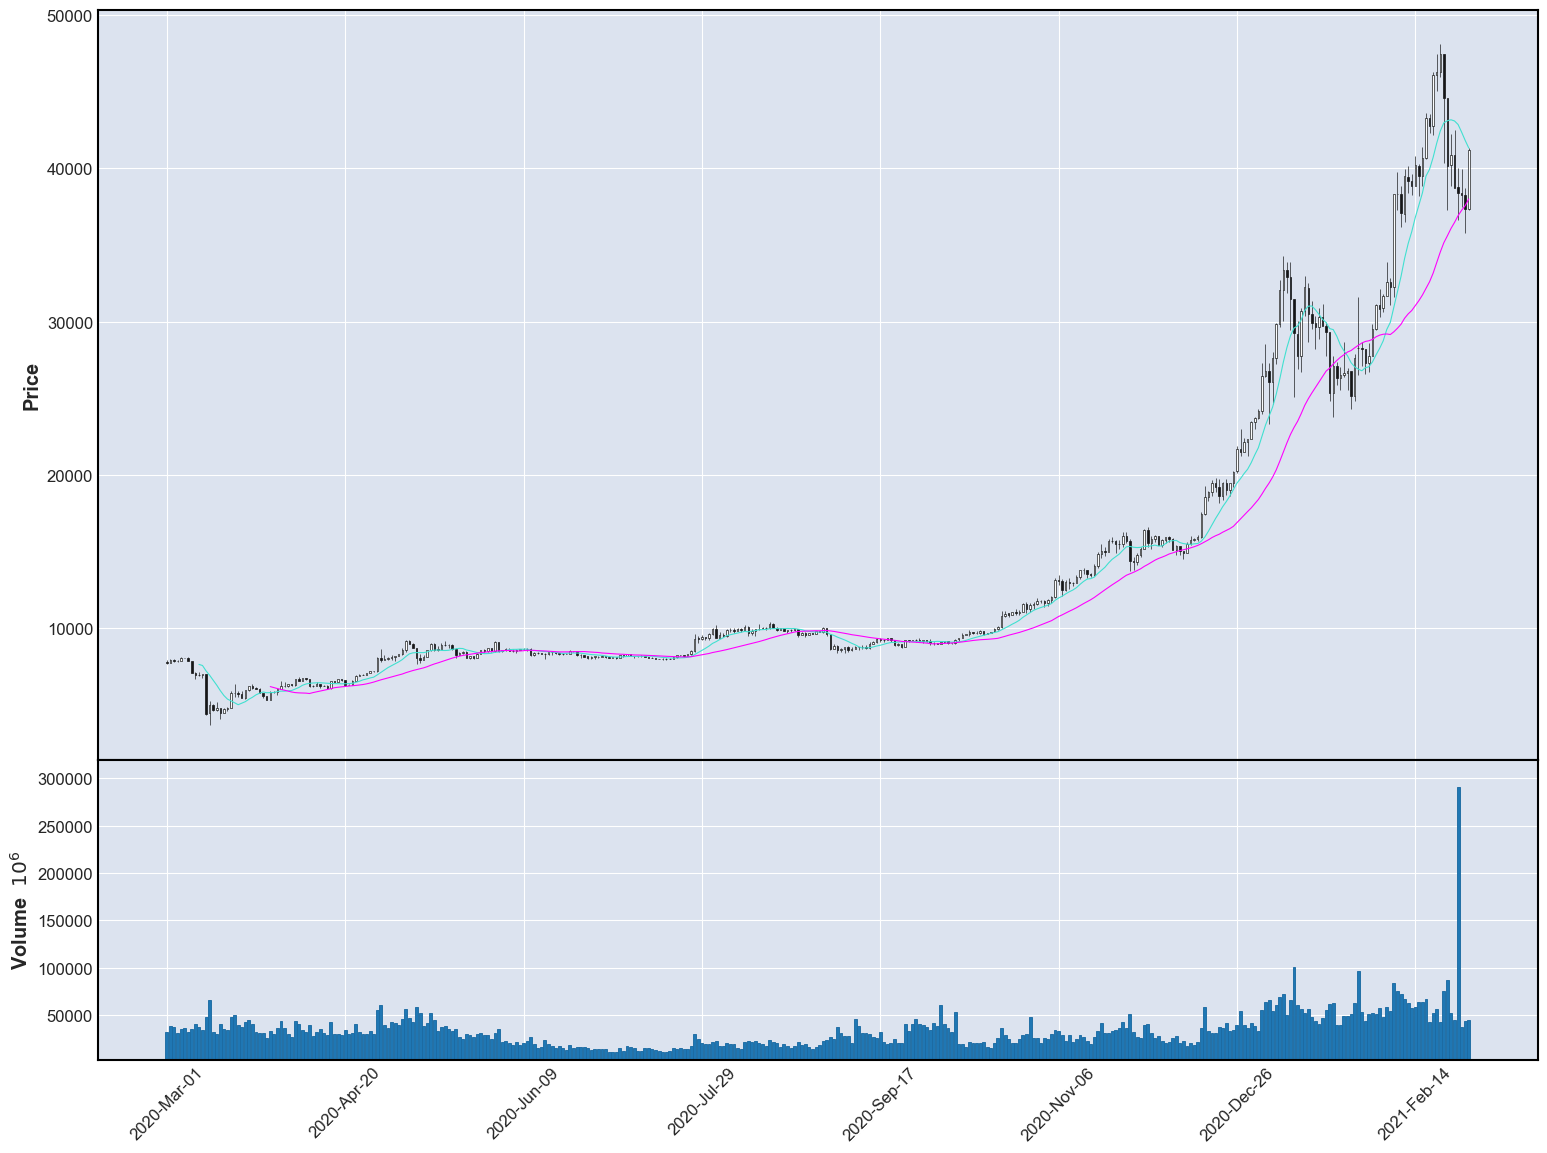

In [328]:
# Ricalcolo i dati con un timeframe a piacere
dati = dati.resample('d').agg({'Open': 'first', 
                                'High': 'max', 
                                'Low': 'min', 
                                'Close': 'last',
                                'Volume': 'sum'})

# Calcola le candele Heiken Ashi
dati = heiken_ashi(dati)

# Calcola le medie mobili esponenziali
dati['EMA10'] = EMA(dati, 10, 'HA_Close')
dati['EMA30'] = EMA(dati, 30, 'HA_Close')

# Crea il grafico
mpf.plot(dati,type='candle',mav=(10,30),volume=True, figsize=(20,15))

##### Codice preso da https://www.youtube.com/watch?v=8TCUKYM-_pY

In [329]:
dfpl = dati[:]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['HA_Open'],
                high=dfpl['HA_High'],
                low=dfpl['HA_Low'],
                close=dfpl['HA_Close']),
                     go.Scatter(x=dfpl.index, y=dfpl.EMA10, line=dict(color='red', width=1), name="EMA10"),
                     go.Scatter(x=dfpl.index, y=dfpl.EMA30, line=dict(color='blue', width=1), name="EMA30")])

fig.show()

In [330]:
dati

,Open,High,Low,Close,Volume,HA_Close,HA_Open,HA_High,HA_Low,EMA10,EMA30
Date,,,,,,,,,,,
2020-03-01,7798.252441,7913.450684,7681.687012,7748.164551,31987458775,7785.388672,7773.208496,7913.450684,7681.687012,7785.388672,7785.388672
2020-03-02,7748.897949,8011.308105,7721.177734,7959.358398,38459105569,7860.185547,7779.298584,8011.308105,7721.177734,7798.988104,7790.214277
2020-03-03,7955.515625,8006.142578,7782.374512,7862.485352,37923648965,7901.629517,7819.742065,8006.142578,7782.374512,7817.650179,7797.402357
2020-03-04,7863.161621,7926.583008,7824.539062,7861.055176,31197955753,7868.834717,7860.685791,7926.583008,7824.539062,7826.956458,7802.010896
2020-03-05,7865.579590,8161.130371,7862.858398,8089.786133,35373626416,7994.838623,7864.760254,8161.130371,7862.858398,7857.480488,7814.451395
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25,40847.492188,42492.488281,38735.164062,38735.164062,44832195559,40202.577148,42017.574821,42492.488281,38735.164062,41849.092780,37597.136444
2021-02-26,38806.402344,40021.406250,36636.480469,38385.910156,290727102068,38462.549805,41110.075985,41110.075985,36636.480469,41233.357694,37652.969564
2021-02-27,38390.062500,39970.886719,37498.867188,38260.480469,38030607901,38530.074219,39786.312895,39970.886719,37498.867188,40741.851607,37709.556961


In [331]:
dati.reset_index(inplace=True)
dati

,Date,Open,High,Low,Close,Volume,HA_Close,HA_Open,HA_High,HA_Low,EMA10,EMA30
0,2020-03-01,7798.252441,7913.450684,7681.687012,7748.164551,31987458775,7785.388672,7773.208496,7913.450684,7681.687012,7785.388672,7785.388672
1,2020-03-02,7748.897949,8011.308105,7721.177734,7959.358398,38459105569,7860.185547,7779.298584,8011.308105,7721.177734,7798.988104,7790.214277
2,2020-03-03,7955.515625,8006.142578,7782.374512,7862.485352,37923648965,7901.629517,7819.742065,8006.142578,7782.374512,7817.650179,7797.402357
3,2020-03-04,7863.161621,7926.583008,7824.539062,7861.055176,31197955753,7868.834717,7860.685791,7926.583008,7824.539062,7826.956458,7802.010896
4,2020-03-05,7865.579590,8161.130371,7862.858398,8089.786133,35373626416,7994.838623,7864.760254,8161.130371,7862.858398,7857.480488,7814.451395
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-25,40847.492188,42492.488281,38735.164062,38735.164062,44832195559,40202.577148,42017.574821,42492.488281,38735.164062,41849.092780,37597.136444
362,2021-02-26,38806.402344,40021.406250,36636.480469,38385.910156,290727102068,38462.549805,41110.075985,41110.075985,36636.480469,41233.357694,37652.969564
363,2021-02-27,38390.062500,39970.886719,37498.867188,38260.480469,38030607901,38530.074219,39786.312895,39970.886719,37498.867188,40741.851607,37709.556961
364,2021-02-28,38265.089844,38697.835938,35819.453125,37332.503906,44202316989,37528.720703,39158.193557,39158.193557,35819.453125,40157.645988,37697.890106


In [342]:
# Simula la strategia di trading
capitale_iniziale = 1773
capitale = capitale_iniziale
bitcoin_iniziali = 0
bitcoin = bitcoin_iniziali
perc_acquisto = 0.5
perc_vendita = 0
azione = 'Vendita'
tabella = pd.DataFrame({'Date': dati['Date'], 'Open': dati['Open'], 'High': dati['High'], 'Low': dati['Low'], 'Close': dati['Close'], 'EMA10': dati['EMA10'], 'EMA30': dati['EMA30'], 'HA_Open': dati['HA_Open'], 'HA_High': dati['HA_High'], 'HA_Low': dati['HA_Low'], 'HA_Close': dati['HA_Close'], 'Azione':'-', 'Acquisto fatto ($)':'-', 'Vendita fatta ($)':'-'})

for i in range(len(dati)):
    condizione1_acquisto = dati['HA_Close'].iloc[i] > dati['HA_Open'].iloc[i]
    condizione1_vendita = dati['HA_Close'].iloc[i] < dati['HA_Open'].iloc[i]
    condizione2_acquisto = dati['HA_Open'].iloc[i] == dati['HA_Low'].iloc[i]
    condizione2_vendita = dati['HA_Open'].iloc[i] == dati['HA_High'].iloc[i]
    condizione3_acquisto = dati.HA_Open[i]<dati.EMA10[i] and dati.HA_Close[i]>dati.EMA30[i]
    condizione3_vendita = dati.HA_Open[i]>dati.EMA10[i] and dati.HA_Close[i]<dati.EMA30[i]

    if azione == 'Vendita' and dati['EMA10'].iloc[i] > dati['EMA30'].iloc[i] and condizione1_acquisto:
        acquisto = capitale * perc_acquisto
        capitale -= acquisto
        bitcoin += acquisto / dati['Close'].iloc[i]
        azione = 'Acquisto'
        tabella['Azione'].iloc[i] = azione
        tabella['Acquisto fatto ($)'].iloc[i] = acquisto
    elif azione == 'Acquisto' and condizione1_vendita:
        vendita = bitcoin * perc_vendita
        bitcoin -= vendita
        capitale += vendita * dati['Close'].iloc[i]
        azione = 'Vendita'
        tabella['Azione'].iloc[i] = azione
        tabella['Vendita fatta ($)'].iloc[i] = vendita * dati['Close'].iloc[i]

tabella['Prezzo di acquisto'] = np.where(tabella['Azione'] == 'Acquisto', tabella['Close'], np.nan)
tabella['Prezzo di vendita'] = np.where(tabella['Azione'] == 'Vendita', tabella['Close'], np.nan)

print('Capitale finale ($):', capitale)
print('Bitcoin finali:', bitcoin)
print('Bitcoin + capitale finali ($):', bitcoin * dati['Close'].iloc[-1] + capitale)
print('Guadagno finale ($):', bitcoin * dati['Close'].iloc[-1] + capitale - bitcoin_iniziali * dati['Close'].iloc[0] - capitale_iniziale)
print('Rendimento:', (bitcoin * dati['Close'].iloc[-1] + capitale) / capitale_iniziale)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_59864\3953238064.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_59864\3953238064.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_59864\3953238064.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_59864\3953238064.py:32: SettingWi

Capitale finale ($): 6.604939699172974e-06
Bitcoin finali: 0.24231217457246923
Bitcoin + capitale finali ($): 9981.369481658756
Guadagno finale ($): 8208.369481658756
Rendimento: 5.629650017856038


In [343]:
tabella

,Date,Open,High,Low,Close,EMA10,EMA30,HA_Open,HA_High,HA_Low,HA_Close,Azione,Acquisto fatto ($),Vendita fatta ($),Prezzo di acquisto,Prezzo di vendita
0,2020-03-01,7798.252441,7913.450684,7681.687012,7748.164551,7785.388672,7785.388672,7773.208496,7913.450684,7681.687012,7785.388672,-,-,-,NaN,NaN
1,2020-03-02,7748.897949,8011.308105,7721.177734,7959.358398,7798.988104,7790.214277,7779.298584,8011.308105,7721.177734,7860.185547,Acquisto,886.5,-,7959.358398,NaN
2,2020-03-03,7955.515625,8006.142578,7782.374512,7862.485352,7817.650179,7797.402357,7819.742065,8006.142578,7782.374512,7901.629517,-,-,-,NaN,NaN
3,2020-03-04,7863.161621,7926.583008,7824.539062,7861.055176,7826.956458,7802.010896,7860.685791,7926.583008,7824.539062,7868.834717,-,-,-,NaN,NaN
4,2020-03-05,7865.579590,8161.130371,7862.858398,8089.786133,7857.480488,7814.451395,7864.760254,8161.130371,7862.858398,7994.838623,-,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-25,40847.492188,42492.488281,38735.164062,38735.164062,41849.092780,37597.136444,42017.574821,42492.488281,38735.164062,40202.577148,-,-,-,NaN,NaN
362,2021-02-26,38806.402344,40021.406250,36636.480469,38385.910156,41233.357694,37652.969564,41110.075985,41110.075985,36636.480469,38462.549805,-,-,-,NaN,NaN
363,2021-02-27,38390.062500,39970.886719,37498.867188,38260.480469,40741.851607,37709.556961,39786.312895,39970.886719,37498.867188,38530.074219,-,-,-,NaN,NaN
364,2021-02-28,38265.089844,38697.835938,35819.453125,37332.503906,40157.645988,37697.890106,39158.193557,39158.193557,35819.453125,37528.720703,-,-,-,NaN,NaN


In [344]:
tabella[tabella['Azione'] == 'Acquisto']

,Date,Open,High,Low,Close,EMA10,EMA30,HA_Open,HA_High,HA_Low,HA_Close,Azione,Acquisto fatto ($),Vendita fatta ($),Prezzo di acquisto,Prezzo di vendita
1,2020-03-02,7748.897949,8011.308105,7721.177734,7959.358398,7798.988104,7790.214277,7779.298584,8011.308105,7721.177734,7860.185547,Acquisto,886.5,-,7959.358398,NaN
37,2020-04-07,6734.172363,6825.347656,6550.847168,6586.584961,6234.187406,6208.196027,6384.652222,6825.347656,6384.652222,6674.238037,Acquisto,443.25,-,6586.584961,NaN
46,2020-04-16,6089.562012,6570.778809,6018.864258,6554.135254,6309.191582,6278.470072,6239.024058,6570.778809,6018.864258,6308.335083,Acquisto,221.625,-,6554.135254,NaN
52,2020-04-22,6336.700684,6609.261230,6326.291504,6585.737305,6435.325591,6352.820659,6434.642574,6609.261230,6326.291504,6464.497681,Acquisto,110.8125,-,6585.737305,NaN
73,2020-05-13,8118.347656,8614.500000,8118.347656,8566.414062,8278.238125,7683.692560,8185.644251,8614.500000,8118.347656,8354.402344,Acquisto,55.40625,-,8566.414062,NaN
87,2020-05-27,8049.352051,8374.552734,8047.246094,8334.069336,8347.162784,8165.693260,8172.542378,8374.552734,8047.246094,8201.305054,Acquisto,27.703125,-,8334.069336,NaN
99,2020-06-08,8622.342773,8662.682617,8568.838867,8644.083984,8585.918815,8412.722990,8569.620632,8662.682617,8568.838867,8624.487061,Acquisto,13.851562,-,8644.083984,NaN
107,2020-06-16,8338.965820,8451.567383,8295.808594,8466.179688,8436.582397,8418.048656,8333.334525,8451.567383,8295.808594,8388.130371,Acquisto,6.925781,-,8466.179688,NaN
114,2020-06-23,8550.852539,8541.969727,8488.791992,8512.656250,8421.738744,8413.623396,8397.096810,8541.969727,8397.096810,8523.567627,Acquisto,3.462891,-,8512.656250,NaN
147,2020-07-26,8304.906250,8599.665039,8281.409180,8499.583984,8204.142869,8190.441895,8221.696549,8599.665039,8221.696549,8421.391113,Acquisto,1.731445,-,8499.583984,NaN


In [345]:
tabella[tabella['Azione'] == 'Vendita']

,Date,Open,High,Low,Close,EMA10,EMA30,HA_Open,HA_High,HA_Low,HA_Close,Azione,Acquisto fatto ($),Vendita fatta ($),Prezzo di acquisto,Prezzo di vendita
6,2020-03-07,8081.902344,8118.742188,7877.323730,7894.343750,7914.775995,7841.815662,8003.351379,8118.742188,7877.323730,7993.078003,Vendita,-,0.0,NaN,7894.343750
40,2020-04-10,6685.138184,6685.138184,6213.720703,6277.594238,6399.141597,6280.810550,6651.107926,6685.138184,6213.720703,6465.397827,Vendita,-,0.0,NaN,6277.594238
50,2020-04-20,6614.316895,6662.609375,6296.366699,6334.223633,6447.700328,6345.197023,6573.722153,6662.609375,6296.366699,6476.879150,Vendita,-,0.0,NaN,6334.223633
70,2020-05-10,8742.696289,8746.716797,7652.442871,8078.630859,8365.522347,7578.680123,8855.920489,8855.920489,7652.442871,8305.121704,Vendita,-,0.0,NaN,8078.630859
80,2020-05-20,8900.679688,8961.728516,8604.085938,8673.226562,8694.382243,8108.836498,8870.398996,8961.728516,8604.085938,8784.930176,Vendita,-,0.0,NaN,8673.226562
94,2020-06-03,8523.133789,8618.751953,8451.131836,8595.483398,8576.908739,8341.956445,8750.000620,8750.000620,8451.131836,8547.125244,Vendita,-,0.0,NaN,8595.483398
102,2020-06-11,8683.803711,8726.690430,8203.429688,8257.708984,8580.296905,8443.328756,8633.171604,8726.690430,8203.429688,8467.908203,Vendita,-,0.0,NaN,8257.708984
110,2020-06-19,8396.203125,8391.541992,8295.801758,8308.077148,8412.099196,8412.147548,8392.867072,8392.867072,8295.801758,8347.906006,Vendita,-,0.0,NaN,8308.077148
115,2020-06-24,8514.858398,8550.426758,8230.860352,8278.496094,8416.633591,8412.335461,8460.332218,8550.426758,8230.860352,8393.660400,Vendita,-,0.0,NaN,8278.496094
155,2020-08-03,9374.371094,9747.130859,9346.390625,9563.894531,9257.706374,8721.397291,9657.842815,9747.130859,9346.390625,9507.946777,Vendita,-,0.0,NaN,9563.894531


##### Mostro i punti di acquisto e vendita nel grafico dei prezzi classico

In [346]:
# Crea il grafico
fig = go.Figure()

# Aggiungi la curva dei prezzi
fig.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Close'], mode='lines', name='Prezzo'))

# Aggiungi i punti di acquisto
fig.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di acquisto'], mode='markers', name='Prezzo di acquisto', marker=dict(color='green')))

# Aggiungi i punti di vendita
fig.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di vendita'], mode='markers', name='Prezzo di vendita', marker=dict(color='red')))

# Aggiungo lo slider sotto
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Mostra il grafico
fig.show()

##### Mostro i punti di acquisto e vendita nel grafico delle candele sia classiche sia di Haiken Ashi

In [347]:
# Crea il grafico delle candele classiche
fig1 = go.Figure()
fig1.add_trace(go.Candlestick(x=tabella['Date'],
                open=tabella['Open'], high=tabella['High'],
                low=tabella['Low'], close=tabella['Close'],
                name='Candele classiche'))
fig1.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di acquisto'], mode='markers', name='Prezzo di acquisto', marker=dict(color='green')))
fig1.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di vendita'], mode='markers', name='Prezzo di vendita', marker=dict(color='red')))
fig1.show()

# Crea il grafico delle candele Heiken Ashi
fig2 = go.Figure()
fig2.add_trace(go.Candlestick(x=tabella['Date'],
                open=tabella['HA_Open'], high=tabella['HA_High'],
                low=tabella['HA_Low'], close=tabella['HA_Close'],
                name='Candele Heiken Ashi'))
fig2.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di acquisto'], mode='markers', name='Prezzo di acquisto', marker=dict(color='green')))
fig2.add_trace(go.Scatter(x=tabella['Date'], y=tabella['Prezzo di vendita'], mode='markers', name='Prezzo di vendita', marker=dict(color='red')))
fig2.show()

##### Grid search dati giornalieri

In [338]:
def condizione1_acquisto(dati, i):
    return dati['HA_Close'].iloc[i] > dati['HA_Open'].iloc[i]

def condizione1_vendita(dati, i):
    return dati['HA_Close'].iloc[i] < dati['HA_Open'].iloc[i]

def condizione2_acquisto(dati, i):
    return dati['HA_Open'].iloc[i] == dati['HA_Low'].iloc[i]

def condizione2_vendita(dati, i):
    return dati['HA_Open'].iloc[i] == dati['HA_High'].iloc[i]

def condizione3_acquisto(dati, i):
    return dati.HA_Open[i]<dati.EMA10[i] and dati.HA_Close[i]>dati.EMA30[i]

def condizione3_vendita(dati, i):
    return dati.HA_Open[i]>dati.EMA10[i] and dati.HA_Close[i]<dati.EMA30[i]


# Mappo le funzioni alle loro etichette
condizioni_acquisto = {1: condizione1_acquisto, 2: condizione2_acquisto, 3: condizione3_acquisto}
condizioni_vendita = {1: condizione1_vendita, 2: condizione2_vendita, 3: condizione3_vendita}

In [350]:
# Definisci le combinazioni di parametri
param_grid = {'EMA_breve': [1, 2, 3, 4],
              'EMA_lunga': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'perc_acquisto': [0.3, 0.35, 0.4, 0.45, 0.5],
              'perc_vendita': [0, 0.1, 0.3],
              'cond_acquisto': list(condizioni_acquisto.keys()),
              'cond_vendita': list(condizioni_vendita.keys())}

# Crea la griglia di parametri
grid = ParameterGrid(param_grid)

# Inizializza il rendimento migliore e la migliore combinazione di parametri
miglior_rendimento = 0
miglior_combinazione = None

# Esegui la grid search
for idx, params in enumerate(grid):
    EMA_breve = params['EMA_breve']
    EMA_lunga = params['EMA_lunga']
    perc_acquisto = params['perc_acquisto']
    perc_vendita = params['perc_vendita']
    cond_acquisto = condizioni_acquisto[params['cond_acquisto']]
    cond_vendita = condizioni_vendita[params['cond_vendita']]
    
    

    # # Ricalcolo i dati con un timeframe a piacere
    # dati = dati.resample('d').agg({'Open': 'first', 
    #                                 'High': 'max', 
    #                                 'Low': 'min', 
    #                                 'Close': 'last',
    #                                 'Volume': 'sum'})

    # # Calcola le candele Heiken Ashi
    # dati = heiken_ashi(dati)

    # Calcola le medie mobili esponenziali
    dati[f'EMA{EMA_breve}'] = EMA(dati, EMA_breve, 'HA_Close')
    dati[f'EMA{EMA_lunga}'] = EMA(dati, EMA_lunga, 'HA_Close')

    # dati.reset_index(inplace=True)

    # Simula la strategia di trading
    capitale_iniziale = 1773
    capitale = capitale_iniziale
    bitcoin_iniziali = 0
    bitcoin = bitcoin_iniziali
    # perc_acquisto = perc_acquisto
    # perc_vendita = perc_vendita
    azione = 'Vendita'
    tabella = pd.DataFrame({'Date': dati['Date'], 'Close': dati['Close'], 'EMA10': dati['EMA10'], 'EMA30': dati['EMA30'], 'HA_Close': dati['HA_Close'], 'HA_Open': dati['HA_Open'], 'Azione':'-', 'Acquisto fatto ($)':'-', 'Vendita fatta ($)':'-'})

    for i in range(len(dati)):
        if azione == 'Vendita' and dati['EMA10'].iloc[i] > dati['EMA30'].iloc[i] and cond_acquisto(dati, i):
            acquisto = capitale * perc_acquisto
            capitale -= acquisto
            bitcoin += acquisto / dati['Close'].iloc[i]
            azione = 'Acquisto'
            # tabella['Azione'].iloc[i] = azione
            # tabella['Acquisto fatto ($)'].iloc[i] = acquisto
        elif azione == 'Acquisto' and cond_vendita(dati, i):
            vendita = bitcoin * perc_vendita
            bitcoin -= vendita
            capitale += vendita * dati['Close'].iloc[i]
            azione = 'Vendita'
            # tabella['Azione'].iloc[i] = azione
            # tabella['Vendita fatta ($)'].iloc[i] = vendita * dati['Close'].iloc[i]

    # tabella['Prezzo di acquisto'] = np.where(tabella['Azione'] == 'Acquisto', tabella['Close'], np.nan)
    # tabella['Prezzo di vendita'] = np.where(tabella['Azione'] == 'Vendita', tabella['Close'], np.nan)


    # Calcola i risultati
    bitcoin_plus_capitale_finali = bitcoin * dati['Close'].iloc[-1] + capitale
    guadagno_finale = bitcoin * dati['Close'].iloc[-1] + capitale - bitcoin_iniziali * dati['Close'].iloc[0] - capitale_iniziale
    rendimento = bitcoin_plus_capitale_finali / capitale_iniziale

    # Se il rendimento è migliore, salva il rendimento e la combinazione di parametri
    if rendimento > miglior_rendimento:
        miglior_rendimento = rendimento
        miglior_combinazione = params
        comb_migliore = idx

    # Stampa i risultati
    print(f'Combinazione {idx+1}/{len(grid)}')
    print(f'EMA_breve: {EMA_breve}, EMA_lunga: {EMA_lunga}, perc_acquisto: {perc_acquisto}, perc_vendita: {perc_vendita}, cond_acquisto: {params["cond_acquisto"]}, cond_vendita: {params["cond_vendita"]}')
    print(f'Bitcoin + capitale finali ($): {bitcoin_plus_capitale_finali}')
    print(f'Guadagno finale ($): {guadagno_finale}')
    print(f'Rendimento: {rendimento}')
    print('------------------------')


# Stampa il rendimento migliore e la migliore combinazione di parametri
print('Miglior rendimento:', miglior_rendimento)
print('Miglior combinazione di parametri:', miglior_combinazione)
print('Numero della combinazione migliore:', comb_migliore + 1)

Combinazione 1/5400
EMA_breve: 1, EMA_lunga: 1, perc_acquisto: 0.3, perc_vendita: 0, cond_acquisto: 1, cond_vendita: 1
Bitcoin + capitale finali ($): 9881.14774123977
Guadagno finale ($): 8108.147741239771
Rendimento: 5.573123373513689
------------------------
Combinazione 2/5400
EMA_breve: 1, EMA_lunga: 1, perc_acquisto: 0.3, perc_vendita: 0.1, cond_acquisto: 1, cond_vendita: 1
Bitcoin + capitale finali ($): 7459.1619570594585
Guadagno finale ($): 5686.1619570594585
Rendimento: 4.207085142165515
------------------------
Combinazione 3/5400
EMA_breve: 1, EMA_lunga: 1, perc_acquisto: 0.3, perc_vendita: 0.3, cond_acquisto: 1, cond_vendita: 1
Bitcoin + capitale finali ($): 5078.149053253973
Guadagno finale ($): 3305.149053253973
Rendimento: 2.8641562624105883
------------------------
Combinazione 4/5400
EMA_breve: 1, EMA_lunga: 1, perc_acquisto: 0.35, perc_vendita: 0, cond_acquisto: 1, cond_vendita: 1
Bitcoin + capitale finali ($): 9962.711880951472
Guadagno finale ($): 8189.711880951472


#### Dati al minuto

In [89]:
# Scelgo quale periodo dei dati tenere

# Leggo i dati
dati = pd.read_csv('Bitcoin dal 01 01 2012 al 31 03 2021 con granularità al minuto (già inputato).csv')
dati['Data'] = pd.to_datetime(dati['Data'])

data_inizio = '2014-09-17'
data_fine = '2021-03-31'
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
indice_inizio = dati[dati['Data'] == data_inizio].index[0]
indice_fine = dati[dati['Data'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1]

dati.set_index('Data', inplace=True)


dati = dati.reset_index()

dati

,Data,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-09-17 00:00:00,1410912000,463.48,463.48,463.48,463.48,0.024196,11.214348,463.480000
1,2014-09-17 00:01:00,1410912060,463.48,463.48,463.48,463.48,0.024196,11.214348,463.480000
2,2014-09-17 00:02:00,1410912120,463.42,463.42,463.42,463.42,0.050000,23.171000,463.420000
3,2014-09-17 00:03:00,1410912180,463.41,463.41,463.41,463.41,0.900000,417.069000,463.410000
4,2014-09-17 00:04:00,1410912240,463.29,463.29,463.29,463.29,0.065000,30.113850,463.290000
...,...,...,...,...,...,...,...,...,...
3430804,2021-03-30 23:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3430805,2021-03-30 23:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3430806,2021-03-30 23:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3430807,2021-03-30 23:59:00,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [91]:
# dati.rename(columns={'Volume_(Currency)': 'Volume'}, inplace=True)

# # Ricalcolo i dati con un timeframe a piacere
# dati = dati.resample('w').agg({'Open': 'first', 
#                                 'High': 'max', 
#                                 'Low': 'min', 
#                                 'Close': 'last',
#                                 'Volume_(Currency)': 'sum'})

# # Calcola le candele Heiken Ashi
dati = heiken_ashi(dati)

# Calcola le medie mobili esponenziali
dati['EMA10'] = EMA(dati, 10, 'HA_Close')
dati['EMA30'] = EMA(dati, 30, 'HA_Close')

# # Crea il grafico
# mpf.plot(dati,type='candle',mav=(10,30),volume=True, figsize=(20,15))

In [92]:
dati

,index,Data,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,HA_Close,HA_Open,HA_High,HA_Low,EMA10,EMA30
0,0,2014-09-17 00:00:00,1410912000,463.48,463.48,463.48,463.48,0.024196,11.214348,463.480000,463.4800,463.480000,463.480000,463.480000,463.480000,463.480000
1,1,2014-09-17 00:01:00,1410912060,463.48,463.48,463.48,463.48,0.024196,11.214348,463.480000,463.4800,463.480000,463.480000,463.480000,463.480000,463.480000
2,2,2014-09-17 00:02:00,1410912120,463.42,463.42,463.42,463.42,0.050000,23.171000,463.420000,463.4200,463.480000,463.480000,463.420000,463.469091,463.476129
3,3,2014-09-17 00:03:00,1410912180,463.41,463.41,463.41,463.41,0.900000,417.069000,463.410000,463.4100,463.450000,463.450000,463.410000,463.458347,463.471863
4,4,2014-09-17 00:04:00,1410912240,463.29,463.29,463.29,463.29,0.065000,30.113850,463.290000,463.2900,463.430000,463.430000,463.290000,463.427739,463.460130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430804,3430804,2021-03-30 23:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,58700.1550,58724.210814,58724.210814,58686.000000,58695.277872,58676.009486
3430805,3430805,2021-03-30 23:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,58686.7950,58712.182907,58712.182907,58683.970000,58693.735531,58676.705326
3430806,3430806,2021-03-30 23:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,58708.6350,58699.488954,58723.840000,58693.430000,58696.444526,58678.765305
3430807,3430807,2021-03-30 23:59:00,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,58753.8325,58704.061977,58770.380000,58704.061977,58706.878703,58683.608350


In [93]:
# Simula la strategia di trading
capitale = 4120
bitcoin = 0
perc_acquisto = 1
perc_vendita = 1
azione = 'vendita'

for i in range(len(dati)):
    if azione == 'vendita' and dati['EMA10'].iloc[i] > dati['EMA30'].iloc[i] and dati['HA_Close'].iloc[i] > dati['HA_Open'].iloc[i]:
        acquisto = capitale * perc_acquisto
        capitale -= acquisto
        bitcoin += acquisto / dati['Close'].iloc[i]
        azione = 'acquisto'
    elif azione == 'acquisto' and dati['HA_Close'].iloc[i] < dati['HA_Open'].iloc[i]:
        vendita = bitcoin * perc_vendita
        bitcoin -= vendita
        capitale += vendita * dati['Close'].iloc[i]
        azione = 'vendita'

print('Capitale finale:', capitale)
print('Bitcoin finali:', bitcoin)
print('Bitcoin + capitale finali ($):', bitcoin * dati['Close'].iloc[-1] + capitale)

Capitale finale: 0.0
Bitcoin finali: 2.60277605007492e-52
Bitcoin + capitale finali ($): 1.5298643917099268e-47
